
# Exploratory Data Analysis

The goal of this notebook is to determine which variables will be impactful in a prediction model.  <br>
Below, I will analyze how each feature correlates with success on the show.

In [1]:
# Import packages and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
cwd = os.getcwd()

In [3]:
data = pd.read_csv(cwd + '/data/li_cleandata.csv')

### Type Conversions

In [4]:
#Set categorical columns to proper data type
category_columns = ['Season', 'Gender', 'Ethnicity', 'Hair', 'Eye', 'Hometown', 'Region', 'OG', 'Casa', 'Status', 'Finalist']

for col in category_columns:
    data[col] = data[col].astype('category')

In [5]:
#Check column datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Name       295 non-null    object  
 1   Season     295 non-null    category
 2   Gender     295 non-null    category
 3   Age        295 non-null    int64   
 4   Height     295 non-null    int64   
 5   Ethnicity  295 non-null    category
 6   Hair       295 non-null    category
 7   Eye        295 non-null    category
 8   Hometown   295 non-null    category
 9   Region     295 non-null    category
 10  Entered    295 non-null    int64   
 11  Dumped     295 non-null    int64   
 12  Stay       295 non-null    int64   
 13  OG         295 non-null    category
 14  Casa       295 non-null    category
 15  Status     295 non-null    category
 16  Couples    295 non-null    int64   
 17  Finalist   295 non-null    category
dtypes: category(11), int64(6), object(1)
memory usage: 26.4+ KB


### Summarize Data 

In [6]:
print("Data Shape: ", data.shape)
data.describe()

Data Shape:  (295, 18)


,Age,Height,Entered,Dumped,Stay,Couples
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,23.884746,68.922034,15.040678,36.671186,21.630508,1.586441
std,2.572805,3.979201,13.565852,15.157125,18.673595,1.331903
min,18.000000,61.000000,1.000000,2.000000,0.000000,0.000000
25%,22.000000,66.000000,1.000000,26.000000,5.000000,1.000000
50%,24.000000,69.000000,12.000000,37.000000,15.000000,1.000000
75%,26.000000,72.000000,26.000000,50.000000,37.000000,2.000000
max,31.000000,79.000000,45.000000,59.000000,58.000000,6.000000


In [7]:
#Seperate dataframes from finalists and non finalists - I'll use these frequently in my analysis
finalists = data[data['Finalist'] == 'Yes']
non_finalists = data[data['Finalist'] == 'No']

### Individual Feature Analysis
**************

#### Age

In [8]:
avg_age = data.Age.mean()
print('Average Age: ' + str(round(avg_age, 2)))

Average Age: 23.88


Text(0.5, 1.0, 'Contestant Count by Age and Season')

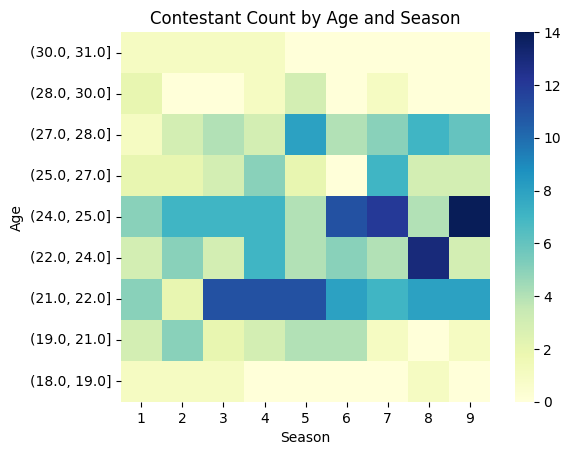

In [9]:
heatmap1 = pd.pivot_table(data, values="Name", 
                              index=[pd.cut(data["Age"], bins=9, precision=0)],
                              columns="Season", aggfunc='count')
heatmap1.sort_index(inplace=True, ascending=False)
sns.heatmap(heatmap1, cmap="YlGnBu", square=True)
plt.title('Contestant Count by Age and Season')

In [10]:
#Average Age by Gender
data.groupby(["Gender"])["Age"].mean()

/tmp/ipykernel_55924/224021123.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["Gender"])["Age"].mean()


Gender
Female    23.510345
Male      24.246667
Name: Age, dtype: float64

Text(0.5, 1.0, 'Contestant Ages')

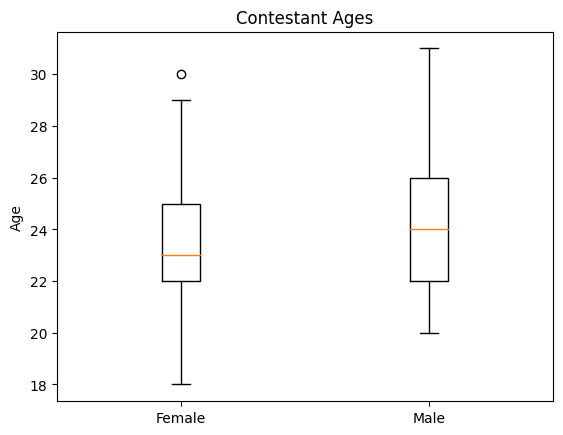

In [11]:
male_ages = data.loc[data['Gender']=='Male', 'Age'].values
female_ages = data.loc[data['Gender']=='Female', 'Age'].values

plt.boxplot([female_ages, male_ages], labels=['Female', 'Male'])
plt.ylabel('Age')
plt.title('Contestant Ages')

Contestant Ages:
- Maximum Age: 31
- Minimum Age: 18
- The majority of contestants are between 22 and 26 years old.
- Male contestants tend to be older in comparison to their female counterparts.

#### Correlation between Age and being a Finalist

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

<Axes: xlabel='Gender', ylabel='Age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


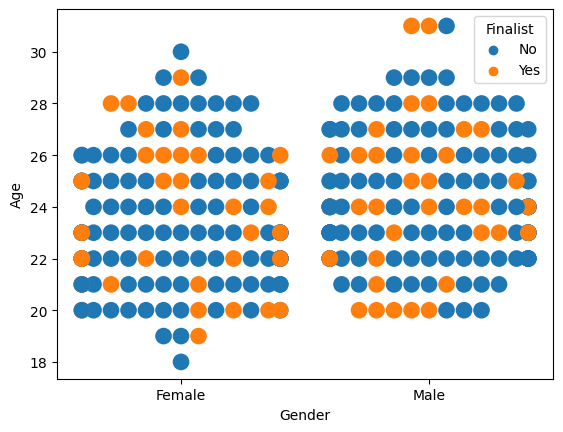

In [12]:
sns.swarmplot(x="Gender", y="Age", hue="Finalist", data=data, size=12)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e67e53b80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e67c80100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e67e538e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8e67c80640>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e67c808e0>,
 'means': []}

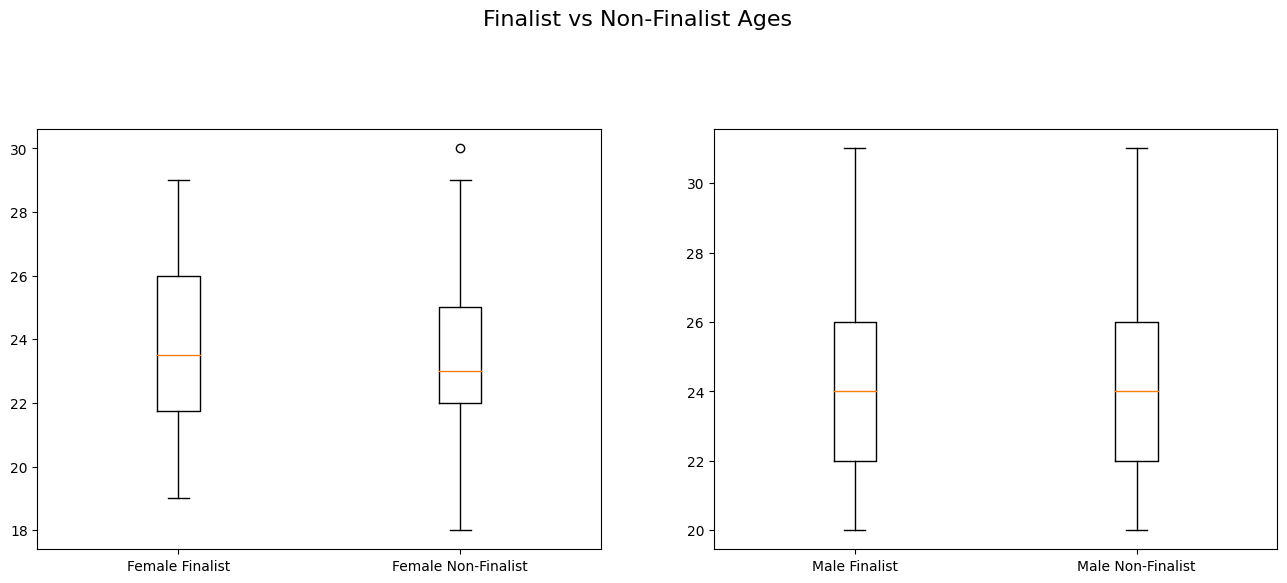

In [13]:
finalist_female_ages = finalists.loc[finalists['Gender']=='Female', 'Age'].values
non_finalist_female_ages = non_finalists.loc[non_finalists['Gender']=='Female', 'Age'].values


finalist_male_ages = finalists.loc[finalists['Gender']=='Male', 'Age'].values
non_finalist_male_ages = non_finalists.loc[non_finalists['Gender']=='Male', 'Age'].values


fig = plt.figure(figsize=(16,12))
fig.suptitle('Finalist vs Non-Finalist Ages', fontsize=16)
ax1 = fig.add_subplot(221)
ax1.boxplot([finalist_female_ages, non_finalist_female_ages], labels=['Female Finalist', 'Female Non-Finalist'])

ax2 = fig.add_subplot(222)
ax2.boxplot([finalist_male_ages, non_finalist_male_ages], labels=['Male Finalist', 'Male Non-Finalist'])


Finalist Age Observations:
- The majority of winners fall between 22 and 26 years old for both genders.
- Male finalists tend to be slightly older than female finalists. 

******************
******************
******************
******************
####  Height

In [14]:
data.groupby(["Gender"])["Height"].mean() 

/tmp/ipykernel_55924/3721363342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["Gender"])["Height"].mean()


Gender
Female    65.634483
Male      72.100000
Name: Height, dtype: float64

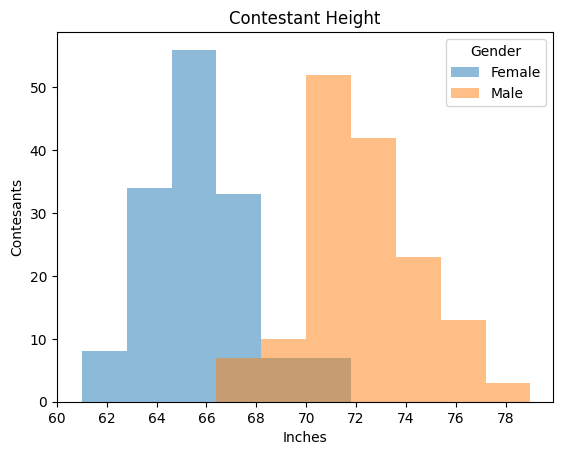

In [15]:
data.pivot(columns='Gender', values='Height').plot.hist(alpha=0.5)
plt.xticks(np.arange(60,80,2))
plt.ylabel('Contesants')
plt.xlabel('Inches')
plt.title('Contestant Height')
plt.show()

Contestants Height:  <br>
Women:
- The average height of women in this dataset is 65.6 inches (5ft 5.5in), exceeding the average height of British women in the UK, which is 63 inches (5ft 3in).
- The height distribution for women in this dataset is concentrated between 63 and 68 inches.

Men:
- The average height of men in this dataset is 72.1 inches (6ft), surpassing the average height of British men in the UK, which is 70 inches (5ft 10in).
- 89% of male contestants are 5ft 10 or taller.
- 54% of male contestants are 6ft or taller.

#### Correlation between Height and being a Finalist

In [16]:
data.groupby(["Gender", "Finalist"])["Height"].mean() 

/tmp/ipykernel_55924/505227910.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(["Gender", "Finalist"])["Height"].mean()


Gender  Finalist
Female  No          65.908257
        Yes         64.805556
Male    No          71.929825
        Yes         72.638889
Name: Height, dtype: float64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

<Axes: xlabel='Gender', ylabel='Height'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 32.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


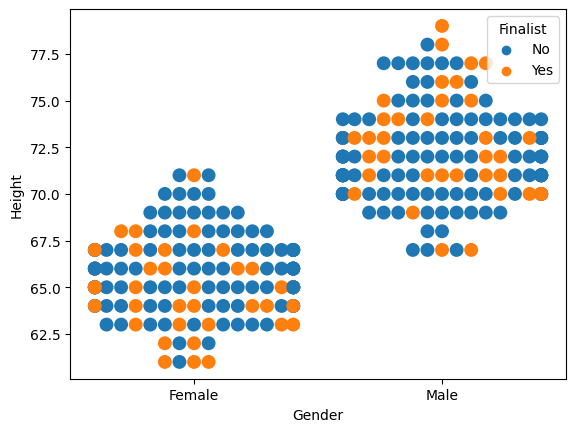

In [19]:
sns.swarmplot(data=data, x="Gender", y="Height", hue="Finalist", size=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8e67a4b9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8e67a4bdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8e67a4b730>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8e67880370>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8e67880610>,
 'means': []}

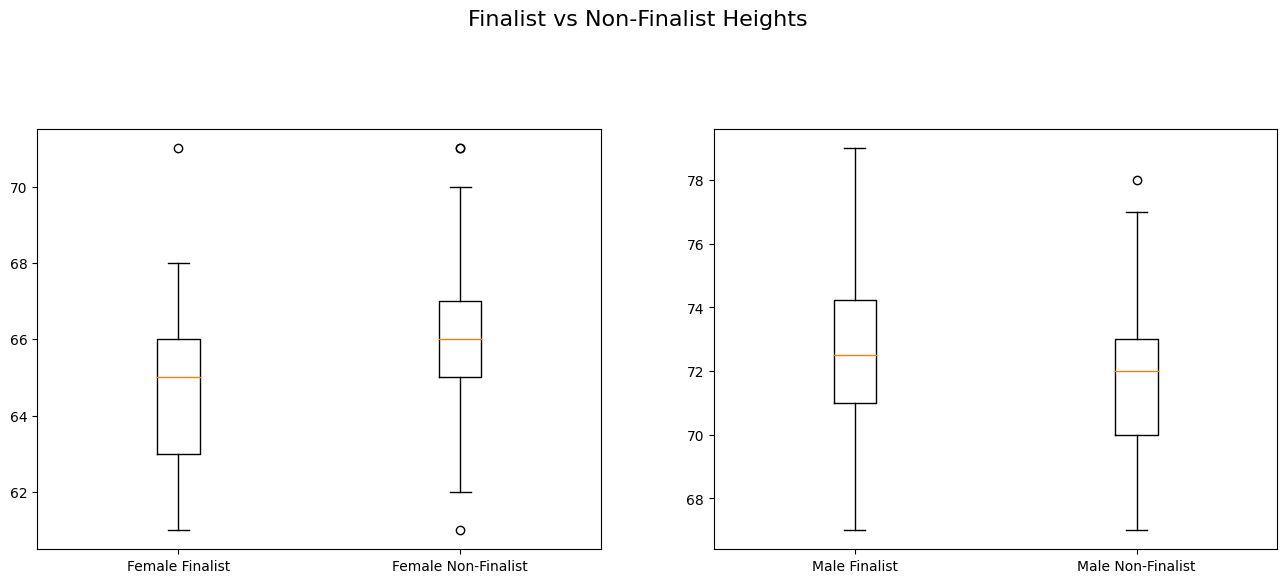

In [20]:
finalist_female_heights = finalists.loc[finalists['Gender']=='Female', 'Height'].values
non_finalist_female_heights = non_finalists.loc[non_finalists['Gender']=='Female', 'Height'].values

finalist_male_heights = finalists.loc[finalists['Gender']=='Male', 'Height'].values
non_finalist_male_heights = non_finalists.loc[non_finalists['Gender']=='Male', 'Height'].values

fig = plt.figure(figsize=(16,12))
fig.suptitle('Finalist vs Non-Finalist Heights', fontsize=16)

ax1 = fig.add_subplot(221)
ax1.boxplot([finalist_female_heights, non_finalist_female_heights], labels=['Female Finalist', 'Female Non-Finalist'])

ax2 = fig.add_subplot(222)
ax2.boxplot([finalist_male_heights, non_finalist_male_heights], labels=['Male Finalist', 'Male Non-Finalist'])

Finalist Height Observations:
- 97% of female finalists are 68 inches tall or less.
- 92% of male finalists are 70 inches tall or more.
- A possible explanation for this is taller women limit their options by not considering shorter partners, reducing success for both tall women and short men.

******************
******************
******************
******************
#### Ethnicity

In [21]:
data.Ethnicity.value_counts()

Ethnicity
White    211
Black     68
Asian     10
MENAT      6
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8e678f6890>,
 [Text(-0.6884524005291436, 0.8579238265753318, 'White'),
  Text(0.5330060230257139, -0.9622393566147212, 'Black'),
  Text(1.0699478180884316, -0.25536575057709776, 'Asian'),
  Text(1.0977552284332397, -0.07023858232827657, 'MENAT')])

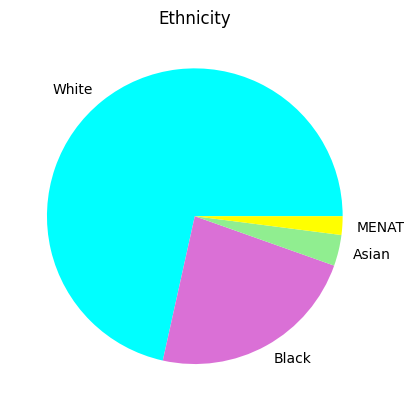

In [22]:
ethnicity = data['Ethnicity'].value_counts()
colors = ['cyan', 'orchid', 'lightgreen', 'yellow']

plt.title('Ethnicity')
plt.pie(ethnicity, labels=ethnicity.index, colors = colors)

#### Correlation between Ethnicity and being a Finalist

In [23]:
pd.pivot_table(data, index=['Finalist'], columns = 'Ethnicity', values = 'Name', aggfunc = 'count')

Ethnicity,Asian,Black,MENAT,White
Finalist,,,,
No,7,51,5,160
Yes,3,17,1,51


([<matplotlib.patches.Wedge at 0x7f8e677b4bb0>,
 [Text(-0.6944579675707465, 0.8530698279024456, 'White'),
  Text(0.5410287359891257, -0.9577514849030562, 'Black'),
  Text(1.0686040011835278, -0.26093196173438576, 'Asian'),
  Text(1.097272183629354, -0.07741934534255382, 'MENAT')])

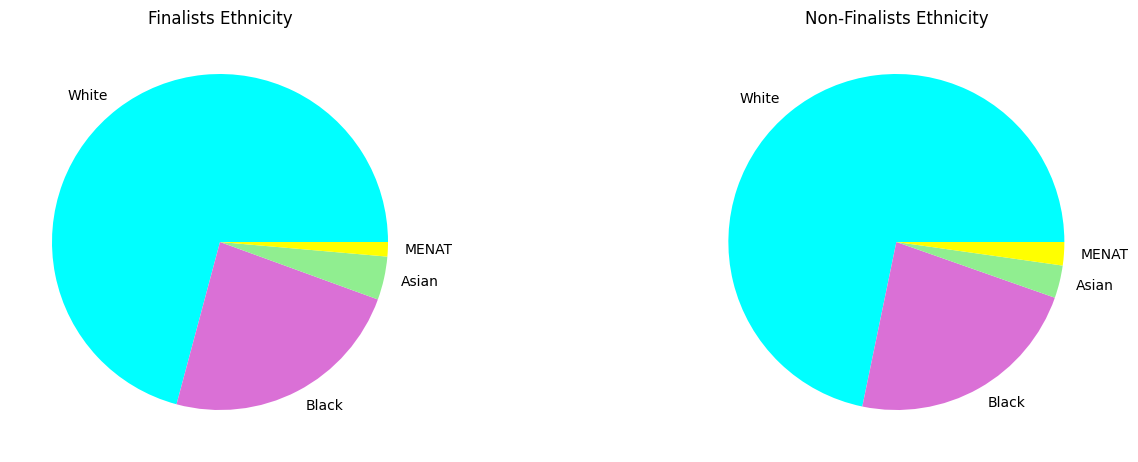

In [24]:
finalist_ethnicity = finalists['Ethnicity'].value_counts()
non_finalist_ethnicity = non_finalists['Ethnicity'].value_counts()
colors = ['cyan', 'orchid', 'lightgreen', 'yellow']


fig = plt.figure(figsize=(16,12))

ax1 = fig.add_subplot(221)
ax1.set_title('Finalists Ethnicity')
ax1.pie(finalist_ethnicity, labels=finalist_ethnicity.index, colors = colors)

ax2 = fig.add_subplot(222)
ax2.set_title('Non-Finalists Ethnicity')
ax2.pie(non_finalist_ethnicity, labels=non_finalist_ethnicity.index, colors = colors)

Contestant Ethnicity Observations: <br>
- The differences between Finalists and non-Finalists for this feature is not very significant.
- It's plausible that a stronger trend might emerge with a larger dataset.

The general population of the UK roughly mirrors the sample of contestants who appear on the show. Statistics on ethnicity from UK census in 2021(Source: https://commonslibrary.parliament.uk/constituency-statistics-ethnicity/) <br>

******************
******************
******************
******************
#### Hair Color and Eye Color

In [25]:
data.Hair.value_counts()

Hair
Brown     141
Blonde     78
Black      74
Red         2
Name: count, dtype: int64

In [26]:
data.Eye.value_counts()

Eye
Brown    168
Blue      98
Green     29
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8e6783ab00>,
 [Text(-0.23824234946483552, 1.0738903961398831, 'Brown'),
  Text(-0.0994367283640226, -1.0954963884250188, 'Blue'),
  Text(1.0479572590196633, -0.33434351088064274, 'Green')])

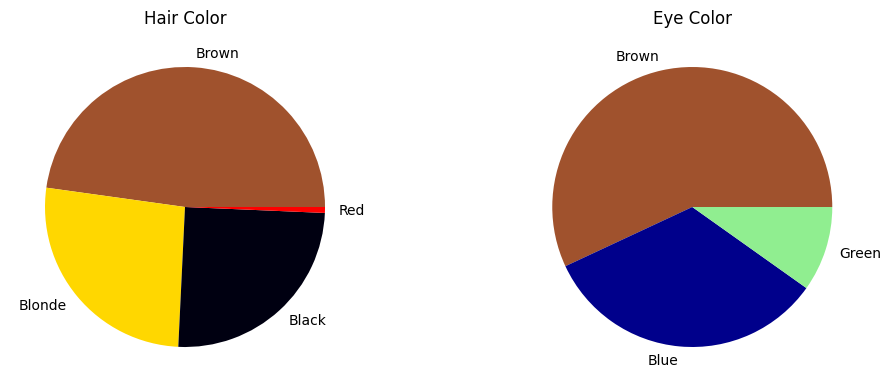

In [27]:
hair = data['Hair'].value_counts()
hair_colors = ['sienna', 'gold', '#000011', '#FF0000']

eye = data['Eye'].value_counts()
eye_colors = ['sienna', 'darkblue', 'lightgreen']

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax1.set_title('Hair Color')
ax1.pie(hair, labels=hair.index, colors = hair_colors)

ax2 = fig.add_subplot(222)
ax2.set_title('Eye Color')
ax2.pie(eye, labels=eye.index, colors = eye_colors)

#### Correlation between Hair and Eye Color and being a Finalist

<Axes: xlabel='Hair'>

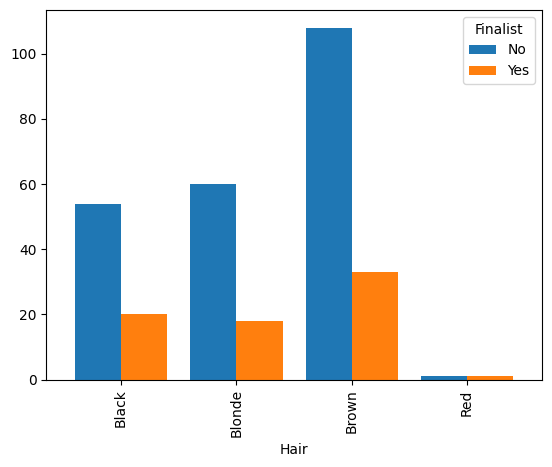

In [28]:
#Hair Color
pd.pivot_table(data, index='Hair', columns = 'Finalist', values = 'Name', aggfunc = 'count').plot.bar(width=0.8)

<Axes: xlabel='Eye'>

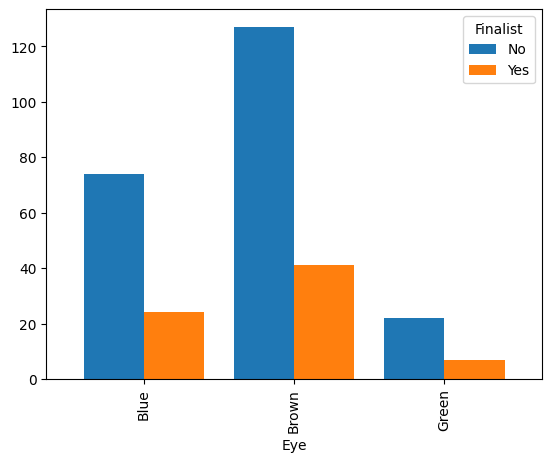

In [30]:
#Eye Color
pd.pivot_table(data, index='Eye', columns = 'Finalist', values = 'Name', aggfunc = 'count').plot.bar(width=0.8)

Contestant Hair and Eye Color Observations:
- Hair and eye color for finalists and non finalists are proportional, none of these features seem to provide a notable advantage.

******************
******************
******************
******************
#### Location

In [31]:
data.Region.value_counts()

Region
England             256
Scotland             13
Ireland              10
Wales                10
Australia             2
Northern Ireland      2
British Isles         1
Isle of Man           1
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8e6598ca60>,
 [Text(0.9917907139568455, 0.475763785621574, 'London'),
  Text(0.4060259831710251, 1.02232230778263, 'Essex'),
  Text(-0.12274515650405525, 1.0931301965250046, 'Manchester'),
  Text(-0.43847475473116193, 1.0088309518762038, 'Newcastle'),
  Text(-0.6226445327173762, 0.9068151883802789, 'Surrey'),
  Text(-0.7589584377359974, 0.7962299226915139, 'Dublin'),
  Text(-0.8615774856595405, 0.6838744301438565, 'Birmingham'),
  Text(-0.9417088458234537, 0.5684931395345584, 'Kent'),
  Text(-1.0016982418004146, 0.45453342272484026, 'Hertfordshire'),
  Text(-1.0443373630446424, 0.34548440217897375, 'Brighton'),
  Text(-1.072606581601752, 0.24395721162655554, 'Bournemouth'),
  Text(-1.0894752579353595, 0.15180139112235427, 'Liverpool'),
  Text(-1.0984409640395925, 0.058544414932349166, 'Leeds'),
  Text(-1.0997505054455083, -0.023427030805233742, 'Glasgow'),
  Text(-1.096010344239071, -0.0936019514804754, 'Norwich'),
  Text(-1.0877969134629566, -0.16339

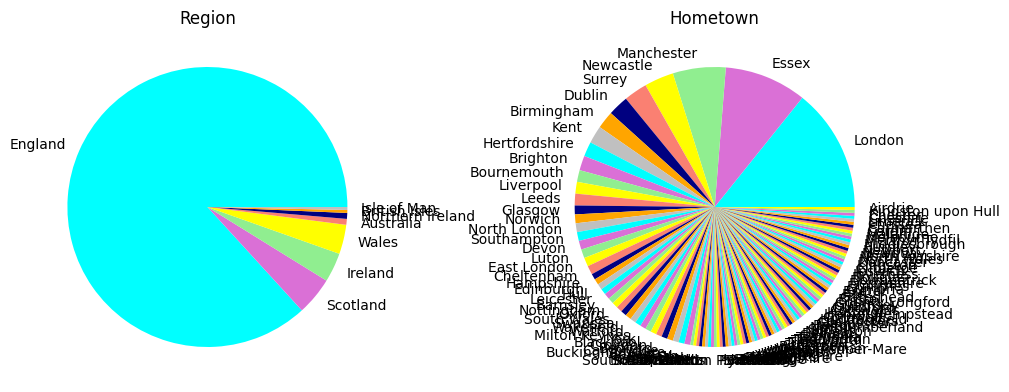

In [32]:
#Region and Hometown pie chart
region = data['Region'].value_counts()
hometown = data['Hometown'].value_counts()

colors = ['cyan', 'orchid', 'lightgreen', 'yellow', 'salmon', 'navy', 'orange', 'silver']

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax1.set_title('Region')
ax1.pie(region, labels=region.index, colors = colors)

ax2 = fig.add_subplot(222)
ax2.set_title('Hometown')
ax2.pie(hometown, labels=hometown.index, colors = colors)

#### Correlation between Location and being a Finalist

In [33]:
pd.pivot_table(data, index=['Finalist'], columns = 'Region', values = 'Name', aggfunc = 'count')

Region,Australia,British Isles,England,Ireland,Isle of Man,Northern Ireland,Scotland,Wales
Finalist,,,,,,,,
No,2,0,194,7,1,1,10,8
Yes,0,1,62,3,0,1,3,2


([<matplotlib.patches.Wedge at 0x7f8e675fa410>,
 [Text(-1.0094685681280475, 0.4370048168630522, 'England'),
  Text(0.8579403919213427, -0.6884317569010402, 'Scotland'),
  Text(1.003212171502439, -0.4511821571708716, 'Wales'),
  Text(1.0755309084284628, -0.2307233516899533, 'Ireland'),
  Text(1.09607269188687, -0.09286901582266888, 'Australia'),
  Text(1.0990177382129607, -0.04647591949890216, 'Isle of Man'),
  Text(1.0998908470524627, -0.015495953349711022, 'Northern Ireland'),
  Text(1.0999999999999852, 1.802315072267083e-07, 'British Isles')])

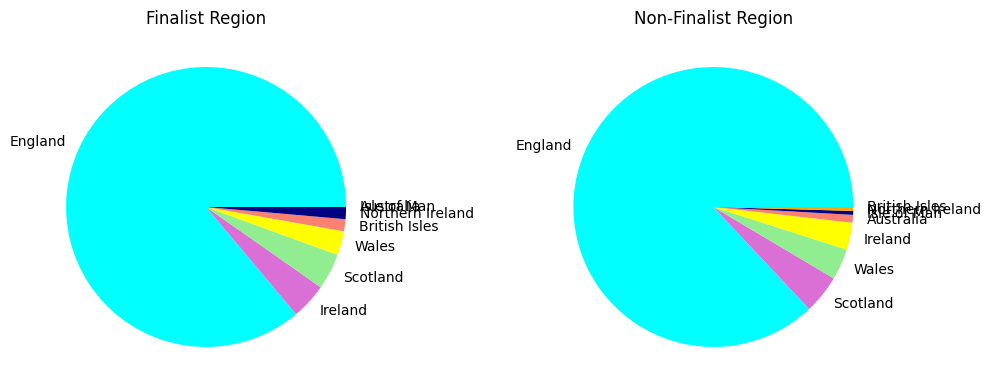

In [34]:
finalist_region = finalists['Region'].value_counts()
non_finalist_region = non_finalists['Region'].value_counts()

colors = ['cyan', 'orchid', 'lightgreen', 'yellow', 'salmon', 'navy', 'orange', 'silver']

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax1.set_title('Finalist Region')
ax1.pie(finalist_region, labels=finalist_region.index, colors = colors)

ax2 = fig.add_subplot(222)
ax2.set_title('Non-Finalist Region')
ax2.pie(non_finalist_region, labels=non_finalist_region.index, colors = colors)

([<matplotlib.patches.Wedge at 0x7f8e65621d20>,
 [Text(0.9762083567102684, 0.5069686817635164, 'London'),
  Text(0.4011880799306102, 1.0242305036082409, 'Essex'),
  Text(-0.03873364193012057, 1.0993178361978984, 'Manchester'),
  Text(-0.3575551344880399, 1.0402664686517777, 'Newcastle'),
  Text(-0.5941122389239567, 0.925759497688662, 'Surrey'),
  Text(-0.7640003715311656, 0.7913933486580748, 'Dublin'),
  Text(-0.8769942839081547, 0.6639887242961459, 'Birmingham'),
  Text(-0.9615385976245041, 0.5342691505957481, 'Hertfordshire'),
  Text(-1.0213791778996775, 0.4083926725015756, 'Kent'),
  Text(-1.0608289468937935, 0.29093288819280194, 'Brighton'),
  Text(-1.0868183876167892, 0.16978160188325112, 'Leeds'),
  Text(-1.0982539485327243, 0.061953728961868175, 'North London'),
  Text(-1.0995633983573911, -0.030989239951077625, 'Bournemouth'),
  Text(-1.0930213202020242, -0.123710927503695, 'Norwich'),
  Text(-1.0786744283440912, -0.21554924643001738, 'Glasgow'),
  Text(-1.0566251680114138, -0.

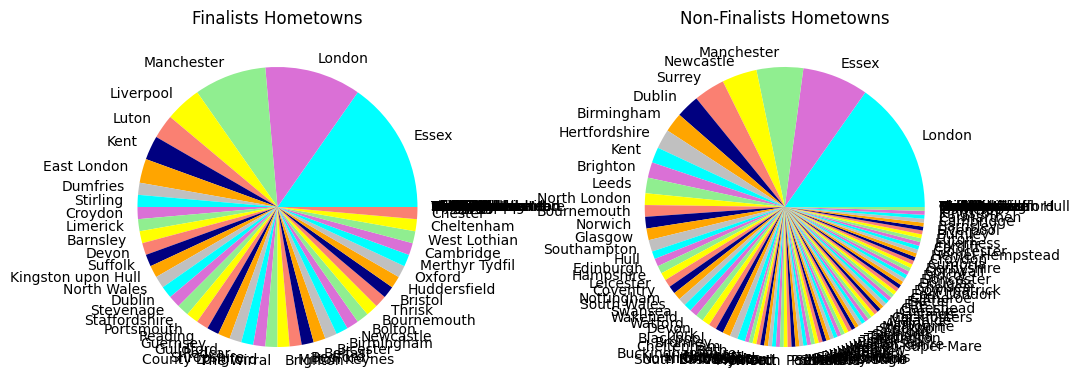

In [35]:
finalist_hometown = finalists['Hometown'].value_counts()
non_finalist_hometown = non_finalists['Hometown'].value_counts()

colors = ['cyan', 'orchid', 'lightgreen', 'yellow', 'salmon', 'navy', 'orange', 'silver']

fig = plt.figure(figsize=(12,10))

ax1 = fig.add_subplot(221)
ax1.set_title('Finalists Hometowns')
ax1.pie(finalist_hometown, labels=finalist_hometown.index, colors = colors)

ax2 = fig.add_subplot(222)
ax2.set_title('Non-Finalists Hometowns')
ax2.pie(non_finalist_hometown, labels=non_finalist_hometown.index, colors = colors)

Contestant Location Observations:
- I will consolidate this feature in the preprocessing notebook to convert this into a more insightful datapoint. <br>

******************
******************
******************
******************
#### Contestant Entry

<Axes: xlabel='Day Entered', ylabel='# of Contestants'>

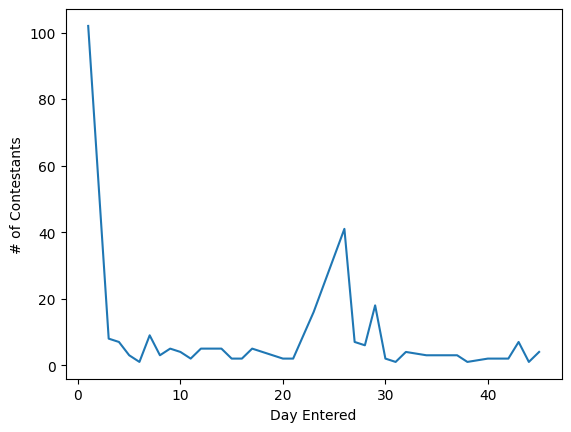

In [36]:
#Line plot of when contestants enter the villa
data.pivot_table(index='Entered', values = 'Name', aggfunc = 'count').plot(xlabel='Day Entered', ylabel='# of Contestants', legend=False)

In [37]:
#Count of Original and non Orginal contestants
data.OG.value_counts()

OG
No     193
Yes    102
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8e653074f0>,
 [Text(-0.30102937065636565, 1.0580081842794187, 'Did Not Reach finale'),
  Text(0.30102946971423916, -1.0580081560950105, 'Reached Finale')])

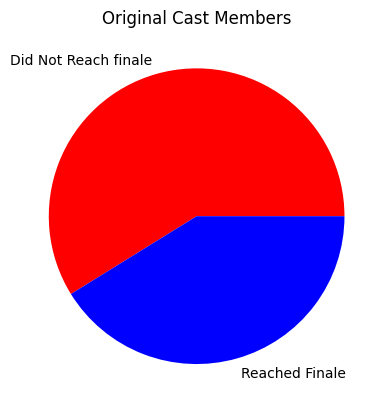

In [38]:
#OG cast members who reached finale
og_cast = data[data['OG'] == 'Yes']

og_finalists = og_cast['Finalist'].value_counts()
colors1 = ['Red','Blue']

plt.title('Original Cast Members')
plt.pie(og_finalists, labels=['Did Not Reach finale', 'Reached Finale'], colors = colors1)

In [39]:
#Count of Casa Amor entries
data.Casa.value_counts()

Casa
No     213
Yes     82
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8e65165e70>,
 [Text(-1.0871084592563645, 0.16791425732573578, 'Did Not Reach finale'),
  Text(1.0871084513957296, -0.16791430821695552, 'Reached Finale')])

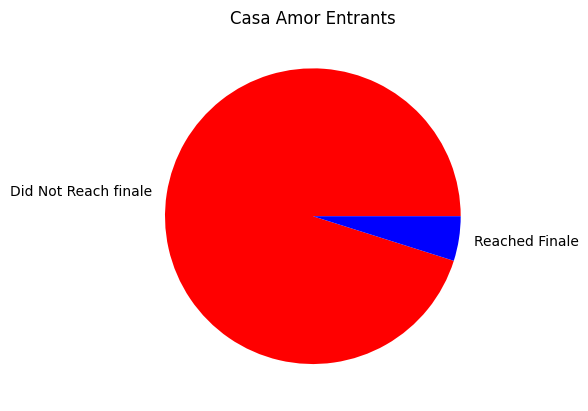

In [40]:
#Pie Chart showing Casa Amor entries who reached finale
casa_cast = data[data['Casa'] == 'Yes']

casa_finalists = casa_cast['Finalist'].value_counts()
colors1 = ['Red','Blue']

plt.title('Casa Amor Entrants')
plt.pie(casa_finalists, labels=['Did Not Reach finale', 'Reached Finale'], colors = colors1)

Contestant Entry:
- A total of 102 contestants entered the show on day 1.
- 82 contestants joined through Casa Amor.
- The combined count from these two entry sources is 184 out of 295, which constitutes 62% of all contestants.
- Among the original cast (OG), 42 contestants (40%) made it to the finale.  

In [41]:
#Casa Amor entries who reached the main villa
casa_survivors = casa_cast[casa_cast['Couples'] >= 1]

survived_casa = casa_survivors.Name.count()
print(str(survived_casa) + ' Casa Amor entries transitioned to the main villa')

40 Casa Amor entries transitioned to the main villa


In [42]:
#Casa Amor entries who reached finale
casa_finalists = casa_cast[casa_cast['Finalist'] == 'Yes']
casa_finalists

,Name,Season,Gender,Age,Height,Ethnicity,Hair,Eye,Hometown,Region,Entered,Dumped,Stay,OG,Casa,Status,Couples,Finalist
174,Ched Uzor,6,Male,23,76,Black,Black,Brown,Suffolk,England,23,43,20,No,Yes,4,1,Yes
201,Sanam Harrinanan,9,Female,24,66,Asian,Black,Brown,Bedford,England,29,58,29,No,Yes,1,1,Yes
209,Ovie Soko,5,Male,28,79,Black,Black,Brown,London,England,26,58,32,No,Yes,3,3,Yes
211,Kazimir Crossley,4,Female,23,63,Asian,Black,Brown,London,England,26,59,33,No,Yes,3,1,Yes


([<matplotlib.patches.Wedge at 0x7f8e651c11e0>,
 [Text(-1.0461621424642782, 0.33991877217145816, 'Did Not Reach finale'),
  Text(1.0461621185951564, -0.33991884563303376, 'Reached Finale')])

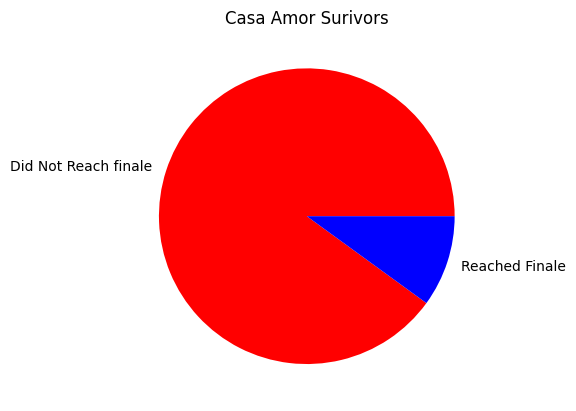

In [43]:
casa_survivor_results = casa_survivors['Finalist'].value_counts()
plt.title('Casa Amor Surivors')
plt.pie(casa_survivor_results, labels=['Did Not Reach Finale', 'Reached Finale'], colors = colors1)

Casa Amor Entry:
- Of the 82 Casa Amor entrants, 40 of them succeeded in coupling up and making it into the main villa.
- This indicates that approximately half of Casa Amor contestants manage to transition from Casa Amor to the main villa.
- Of the 40 Casa Amor survivors, 4 successfully progressed to the finale.
- Among all Casa Amor contestants who do make it into the main villa, 10% of them eventually reach the finale, underscoring the limited potential for success even after entering the main villa from Casa Amor.

******************
******************
******************
******************
#### Couples

In [44]:
data.Couples.value_counts()

Couples
1    108
0     63
2     52
3     41
4     23
5      7
6      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Couples by Gender')

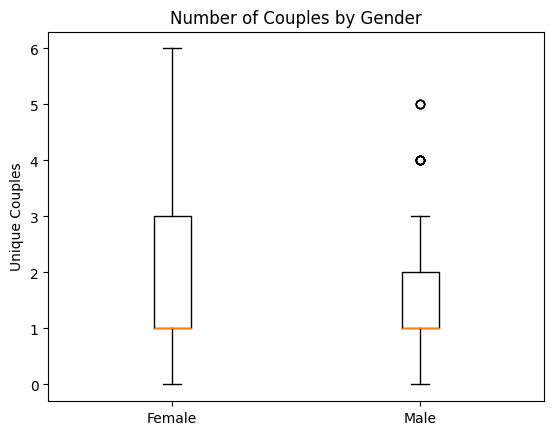

In [45]:
#Number of partners by Gender
female_couples = data.loc[data['Gender']=='Female', 'Couples'].values
male_couples = data.loc[data['Gender']=='Male', 'Couples'].values

plt.boxplot([female_couples, male_couples], labels=['Female', 'Male'])
plt.ylabel('Unique Couples')
plt.title('Number of Couples by Gender')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

<Axes: xlabel='Gender', ylabel='Couples'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


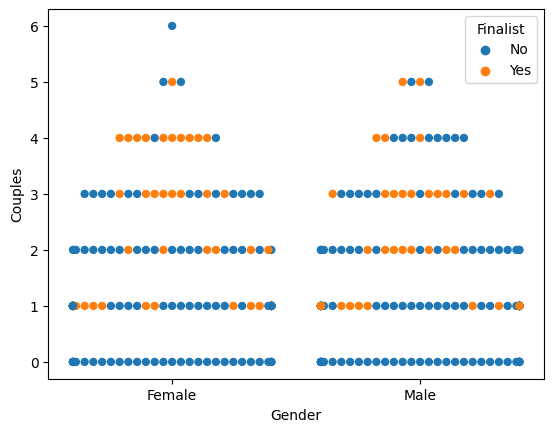

In [46]:
#Swarmplot of couples by Gender
sns.swarmplot(data=data, x="Gender", y="Couples", hue="Finalist", size=6)

Contestant Couples Observations:

- On average, finalists tend to have more unique couples than non-finalists. However, this data can be deceptive due to Casa Amor entries having 0 couples if they don't advance to the main villa.
    - A substantial portion of Casa Amor contestants have 0 couples. This is attributed to the challenge of transitioning from Casa Amor to the main villa.
    - While there's an observable correlation between the number of couples and success, further feature engineering is needed to make this data more useful.
- If a woman has 4 or more couples, her probability of becoming a finalist seems to improve.
- If a man has 4 or more couples, his chances seem to decrease.

******************
******************
******************
******************
### Analyzing Outliers and Interesting Trends

In [47]:
#Seperate finalists by Gender
female_finalists = finalists[finalists['Gender']=='Female']
male_finalists = finalists[finalists['Gender']=='Male']

In [48]:
#Select female finalists over 28 years old
old_female_finalists = female_finalists[female_finalists['Age'] >= 28]
old_female_finalists

,Name,Season,Gender,Age,Height,Ethnicity,Hair,Eye,Hometown,Region,Entered,Dumped,Stay,OG,Casa,Status,Couples,Finalist
148,India Reynolds,5,Female,28,66,White,Brown,Brown,Reading,England,43,58,15,No,No,3,1,Yes
248,Maura Higgins,5,Female,28,66,White,Brown,Green,County Longford,Ireland,10,58,48,No,No,4,4,Yes
293,Laura Anderson,4,Female,29,66,White,Blonde,Blue,Stirling,Scotland,1,59,58,Yes,No,2,3,Yes


In [49]:
#Select male finalists over 28 years old
old_male_finalists = male_finalists[male_finalists['Age'] >= 28]
old_male_finalists

,Name,Season,Gender,Age,Height,Ethnicity,Hair,Eye,Hometown,Region,Entered,Dumped,Stay,OG,Casa,Status,Couples,Finalist
154,Paul Knops,4,Male,31,73,White,Brown,Brown,Bournemouth,England,43,59,16,No,No,2,1,Yes
209,Ovie Soko,5,Male,28,79,Black,Black,Brown,London,England,26,58,32,No,Yes,3,3,Yes
256,Marcel Somerville,3,Male,31,74,Black,Black,Brown,London,England,1,52,51,Yes,No,4,3,Yes
270,Scott Thomas,2,Male,28,75,White,Brown,Brown,Manchester,England,1,58,57,Yes,No,3,2,Yes


Female finalists 28 and older observations:
- 2 of them were from season 5. Season 5 had a high concentration 27/28 year old candidates.
- All 3 were the same height, within the normal range for women on the show.

Male finalists 28 and older observations:
- All of them were taller than the average male contestant.
- 2 were Original Cast members.
- One was a Casa Amor entrant (he is also the tallest cast member to appear on the show).

No finalists have been 28 or older since season 5, so finalists may be trending younger. <br>
These candidates had other features positively correlated with being a finalist which may have helped to offset their age being outside the norm for their respective genders.

In [50]:
#Select female finalists over 70 inches tall
tall_female_finalists = female_finalists[female_finalists['Height'] > 68]
tall_female_finalists

,Name,Season,Gender,Age,Height,Ethnicity,Hair,Eye,Hometown,Region,Entered,Dumped,Stay,OG,Casa,Status,Couples,Finalist
257,Olivia Attwood,3,Female,26,71,White,Blonde,Blue,Guildford,England,1,52,51,Yes,No,3,4,Yes


In [51]:
#Select male finalists under 70 inches tall
short_male_finalists = male_finalists[male_finalists['Height'] < 70]
short_male_finalists

,Name,Season,Gender,Age,Height,Ethnicity,Hair,Eye,Hometown,Region,Entered,Dumped,Stay,OG,Casa,Status,Couples,Finalist
231,Josh Ritchie,1,Male,20,69,White,Brown,Blue,Bolton,England,1,41,40,Yes,No,3,3,Yes
241,Nathan Massey,2,Male,25,67,White,Brown,Brown,Essex,England,1,45,44,Yes,No,1,1,Yes
255,Kem Cetinay,3,Male,21,67,White,Brown,Brown,Essex,England,1,52,51,Yes,No,1,4,Yes


The only female finalist 70 inches or more has some features that may have helped to overcome any drawbacks from her height:
- She was an original cast member.
- She also had 4 unique couples, which seems to be a favorable number of couples for women on the show to reach the finale.

The three male finalists under 70 inches had some similarities which may explain their success despite their lack of height:
- All 3 of them were Original Cast Members.
- 2 of them are from Essex. Could location be indicative of success? I will explore this further in preprocessing.
- Two of them (Josh and Kem) are on the younger end of the spectrum. 
- Another intersting observation - They are from seasons 1,2 and 3. Therefore no male under 70 inches has been a finalist since season 3.

In [52]:
#Select female finalists who were a part of 4 or more couples
four_couples_female_finalists = female_finalists[female_finalists['Couples'] >= 4]
four_couples_female_finalists

,Name,Season,Gender,Age,Height,Ethnicity,Hair,Eye,Hometown,Region,Entered,Dumped,Stay,OG,Casa,Status,Couples,Finalist
229,Jessica Hayes,1,Female,22,65,White,Red,Blue,Oxford,England,1,41,40,Yes,No,1,4,Yes
232,Lauren Richardson,1,Female,26,68,White,Blonde,Green,East London,England,1,41,40,Yes,No,3,4,Yes
242,Olivia Buckland,2,Female,22,64,White,Blonde,Brown,Essex,England,1,45,44,Yes,No,2,4,Yes
248,Maura Higgins,5,Female,28,66,White,Brown,Green,County Longford,Ireland,10,58,48,No,No,4,4,Yes
253,Amber Davies,3,Female,20,62,White,Brown,Green,North Wales,Wales,1,52,51,Yes,No,1,4,Yes
254,Camilla Thurlow,3,Female,27,63,White,Blonde,Brown,Dumfries,Scotland,1,52,51,Yes,No,2,4,Yes
257,Olivia Attwood,3,Female,26,71,White,Blonde,Blue,Guildford,England,1,52,51,Yes,No,3,4,Yes
271,Amber Gill,5,Female,21,64,Black,Brown,Brown,Newcastle,England,1,58,57,Yes,No,1,5,Yes
275,Faye Winter,7,Female,26,67,White,Blonde,Blue,Devon,England,1,58,57,Yes,No,3,4,Yes
276,Kaz Kamwi,7,Female,26,63,Black,Black,Brown,Essex,England,1,58,57,Yes,No,4,4,Yes


In [53]:
#Select male finalists who were a part of 4 or more couples
four_couples_male_finalists = male_finalists[male_finalists['Couples'] >= 4]
four_couples_male_finalists

,Name,Season,Gender,Age,Height,Ethnicity,Hair,Eye,Hometown,Region,Entered,Dumped,Stay,OG,Casa,Status,Couples,Finalist
214,Adam Maxted,2,Male,24,75,White,Brown,Brown,Belfast,Northern Ireland,11,45,34,No,No,4,5,Yes
233,Luis Morrison,1,Male,20,75,Black,Brown,Brown,London,England,1,41,40,Yes,No,4,4,Yes
255,Kem Cetinay,3,Male,21,67,White,Brown,Brown,Essex,England,1,52,51,Yes,No,1,4,Yes
277,Toby Aromolaran,7,Male,22,71,Black,Black,Brown,Essex,England,1,58,57,Yes,No,2,4,Yes
285,Kai Fagan,9,Male,24,76,Black,Black,Brown,Manchester,England,1,58,57,Yes,No,1,5,Yes


Women with 4 or more couples:
- Notably, all but 1 of these women were Original Cast members. The only non-original cast member entered the villa relatively early on day 10.

Men with 4 or more couples:
- All but 1 of these men were original cast members, and the one who was not entered the villa relatively early on day 11.
- 3 of 5 were taller than the average male cast member.
- All 5 were 24 or younger.

### Summary of Data Analysis - What Features do Love Island Finalists Have in Common?
*******

Male Finalists:
- Tend to be  within the 22-26 age range.
- Likely to be over 70 inches.
- Likely to be original cast members.
- Likely to have been in less than 4 couples.

Female Finalists:
- Tend to be  within the 22-26 age range.
- Likely to be under 68 inches.
- Likely to be original cast members.
- Likely to have been in 4 or more couples.

Now that we have a basic understanding of the patterns and trends in this dataset, I will ready the data for modeling in data_preprocessing.ipynb.